<a href="https://colab.research.google.com/github/wilaipa/KKU_data_mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import make_blobs

In [19]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [20]:
X.shape

(300, 2)

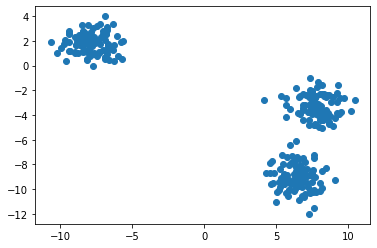

In [21]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

## Import

In [22]:
from sklearn.cluster import KMeans

## Define

In [23]:
KMclust = KMeans(n_clusters=5)

## Train

In [24]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Predict

In [25]:
label = KMclust.predict(X)

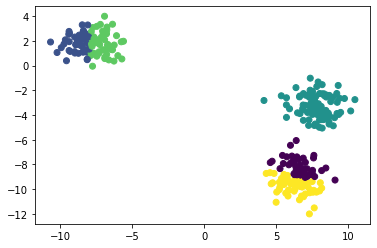

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=label)

## Color quantization (application of kmean)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import cv2
import os

In [29]:
img = cv2.imread(os.path.join(path,'83ba3efb63eb0ad83223a2156a567da9.jpg'))

In [30]:
img

In [31]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

error: ignored

In [32]:
RGB_img.shape

NameError: ignored

## count unique colors

In [35]:
import numpy as np

In [36]:
np.unique(np.reshape(RGB_img,(1724*959,3)),axis=0).shape

NameError: ignored

Use K-mean to reduce color from 256 colors to 8 colors

In [37]:
#Define
myQuantize = KMeans(n_clusters=8)

In [38]:
img_row = np.reshape(RGB_img,(1724*959,3))
img_row

NameError: ignored

In [39]:
img_row.shape

NameError: ignored

In [40]:
#Train
myQuantize.fit(img_row)

NameError: ignored

In [41]:
#Predict
res = myQuantize.predict(img_row)

NameError: ignored

In [42]:
res

NameError: ignored

## Get cluster centers

In [43]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

AttributeError: ignored

In [44]:
Clus_cen.shape

NameError: ignored

## Map color back to the image

In [45]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

NameError: ignored

In [46]:
new_img_ = new_img/255

NameError: ignored

In [47]:
plt.imshow(new_img_)

NameError: ignored